# Streets to Avoid Recommender: High-Risk Street Prediction Model

### Currently only available for Washington, USA

### Baisakhi Sarkar
Master of Science in Data Science at University of Washington, Seattle

Contact Information: baisakhi771@gmail.com/bsarka@uw.edu

### Objective
The goal of this project is to **predict high-risk times on specific streets and recommend streets to avoid** based on accident likelihood. This model identifies times when certain streets are more prone to accidents, helping drivers, especially vulnerable groups like the elderly, to avoid these areas during high-risk periods. Traffic management agencies can also use this model to optimize resource allocation and proactively issue warnings.

### Approach

1. **Feature Selection**:
   - **Key Predictive Features**: `Street`,`City`, `Start_Time`, `Severity`, `Visibility(miles)`, `Precipitation(in)`, `Temperature(F)`, `Humidity(%)` and `Weather_Condition`.
   - **Data Transformation**:
     - **Time-Based Features**: Extract details like hour of the day, day of the week, and month from `Start_Time` to capture patterns in accident occurrences.
     - **Accident Severity**: This feature helps highlight higher-risk times with more severe accidents.
     - **Environmental Conditions**: `Visibility(miles)`, `Precipitation(in)`, `Temperature(F)`, `Humidity(%)` and `Weather_Condition` provide essential information, as weather has a major impact on accident risk.

2. **Modeling Approach**:
   - **Data Preprocessing**: Encode categorical variables (e.g., `Weather_Condition`, `Street`, `City`) and standardize continuous features like `Visibility`.
   - **Classification Models**:
     - **Random Forest**: A robust tree-based model effective for handling complex relationships. (Preferred)
     - **Gradient Boosting**: An ensemble approach that builds trees sequentially, which often excels with complex interactions.
   - **Rule-Based Models**: Simple rule-based models (e.g., "avoid icy streets at night") can complement machine learning predictions, adding interpretability to the model’s output.

3. **Training and Evaluation**:
   - **Evaluation Metrics**: Metrics like ROC-AUC, Precision, and Recall are essential as accident prediction involves imbalanced classes (high-risk vs. low-risk).
   - **Hyperparameter Tuning**: Use Grid Search or Randomized Search to fine-tune the model, focusing on accuracy and recall for high-risk predictions.

### Potential Models

1. **Random Forest**: Handles non-linear relationships and interacts well with complex data.
2. **Gradient Boosting**: Known for strong performance on complex data but requires tuning.
3. **Rule-Based Models**: These straightforward, interpretable models can act as baselines or complement more advanced models.

### Outcome

The model will recommend **streets to avoid at specific times** based on accident likelihood. The output will benefit:

- **Traffic Management**: Agencies can allocate resources, set up warnings, or divert traffic based on the model’s recommendations. By identifying high-risk times and locations, traffic control can be optimized for better safety and efficiency.

- **Driver Safety**: Helps drivers, especially those more vulnerable to accidents (e.g., elderly drivers), avoid high-risk streets during hazardous periods. Personalized recommendations based on time, weather, and road conditions offer an extra layer of security.

- **Seasonal and Time-Based Analysis**: Provides insights into seasonal accident trends (e.g., winter evenings or summer weekends with higher accident rates) to help traffic agencies plan **targeted safety campaigns** and allocate resources more effectively.

- **Infrastructure and Maintenance Planning**: Identifies roads with high accident likelihood over time, signaling the need for **road maintenance, better lighting, or additional traffic signals**. This data allows urban planners to prioritize infrastructure upgrades for high-risk locations.

- **Personalized Driver Recommendations**: Offers customized safety recommendations for drivers, especially those with specific needs (e.g., elderly drivers). This can suggest safer routes based on individual risk factors like visibility and road type.

- **Enhanced Emergency Response**: Enables **pre-positioning of emergency services** closer to high-risk areas during peak times, reducing response times in case of accidents.

- **Pedestrian and Cyclist Safety**: Helps identify zones with higher risks for non-motorized road users, allowing planners to design **safer pedestrian crossings or cyclist lanes** and consider time-based road restrictions in high-traffic areas.

These outputs make the **Streets to Avoid Recommender** a versatile tool for improving road safety, guiding urban planning, and supporting data-driven decision-making across various sectors.


### Future Work

- **Integration with Google Weather API**: Incorporate live weather conditions to enhance prediction accuracy.
  
  - **Automated Data Entry**: Automatically fill fields like weather and temperature with real-time conditions, reducing manual input and improving ease of use.
  - **Location-Based Risk Assessment**: Real-time weather updates will make predictions more relevant based on the user’s location.
  - **Real-Time Alerts**: Integration with navigation apps (e.g., Google Maps, Waze) can provide **real-time alerts** for high-risk areas, helping drivers adjust their routes dynamically based on live conditions.
  - **Weather-Dependent Risk Notifications**: By coupling predictions with live weather data, the model can send **dynamic risk alerts** when adverse weather conditions increase accident risks, enabling proactive adjustments to travel plans.

- **Additional Data Sources**: Integrate data from local traffic agencies or public road condition APIs for more accurate risk assessment.

This future work will make the **Streets to Avoid Recommender more user-friendly and dynamic**, providing location-based recommendations and enhancing road safety insights.


In [44]:
%pip install seaborn
%pip install folium geopandas
%pip install scikit-learn
%pip install sklearn
%pip install xgboost
%pip install imblearn
%pip install lightgbm
%pip install ipywidgets
%pip install gdown


Note: you may need to restart the kernel to use updated packages.
  Using cached geopandas-1.0.1-py3-none-any.whl.metadata (2.2 kB)
  Using cached pyogrio-0.10.0-cp311-cp311-macosx_12_0_arm64.whl.metadata (5.5 kB)
  Using cached pyproj-3.7.0.tar.gz (225 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [1 lines of output]
      proj executable not found. Please set the PROJ_DIR variable. For more information see: https://pyproj4.github.io/pyproj/stable/installation.html
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.
Note: you ma

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
from matplotlib import cm, colors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from datetime import datetime
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.compose import ColumnTransformer
import lightgbm as lgb
from joblib import dump
import pickle
import joblib
import warnings
import gdown

In [46]:
warnings.filterwarnings("ignore")

#### Google drive file links

Model files are uploaded after all of the notebook cells are executed

[US_Accidents_March23.csv](https://drive.google.com/file/d/1wMjqDFzYqFJ3RgYuzwxlRIe6gGv_gbdg/view?usp=sharing)

[high_risk_street_brf_model_with_city.joblib](https://drive.google.com/file/d/17SYk-DlgJLtla-ZTbKNcfa7OCMW5d2dr/view?usp=sharing)

[high_risk_street_model_with_city.joblib](https://drive.google.com/file/d/1Rd0IE4ODS10hitJi06SVgefRKqY2l3TN/view?usp=sharing)

[high_risk_street_model_tuned.joblib](https://drive.google.com/file/d/1jdP2oiToh24oa58tIKftH1CiQUmL08sV/view?usp=sharing)

In [47]:
#raw_df = pd.read_csv("US_Accidents_March23.csv")
# Google Drive file ID for data CSV file
file_id = "1wMjqDFzYqFJ3RgYuzwxlRIe6gGv_gbdg"  
url = f"https://drive.google.com/uc?id={file_id}"

# Download the file using gdown
output = "US_Accidents_March23.csv"
gdown.download(url, output, quiet=False)

# Load the CSV file into a DataFrame
raw_df = pd.read_csv(output)

# Display the first few rows
print(raw_df.head())

Downloading...
From (original): https://drive.google.com/uc?id=1wMjqDFzYqFJ3RgYuzwxlRIe6gGv_gbdg
From (redirected): https://drive.google.com/uc?id=1wMjqDFzYqFJ3RgYuzwxlRIe6gGv_gbdg&confirm=t&uuid=8bfec617-f670-48c8-9508-6aec76cf07c9
To: /Users/baisakhisarkar/Downloads/Miscellaneous_Projects/US_Accident/Car-Accident-High-Risk-Washington-Street-Recommendations/US_Accidents_March23.csv
100%|██████████| 3.06G/3.06G [01:21<00:00, 37.3MB/s]


    ID   Source  Severity           Start_Time             End_Time  \
0  A-1  Source2         3  2016-02-08 05:46:00  2016-02-08 11:00:00   
1  A-2  Source2         2  2016-02-08 06:07:59  2016-02-08 06:37:59   
2  A-3  Source2         2  2016-02-08 06:49:27  2016-02-08 07:19:27   
3  A-4  Source2         3  2016-02-08 07:23:34  2016-02-08 07:53:34   
4  A-5  Source2         2  2016-02-08 07:39:07  2016-02-08 08:09:07   

   Start_Lat  Start_Lng  End_Lat  End_Lng  Distance(mi)  ... Roundabout  \
0  39.865147 -84.058723      NaN      NaN          0.01  ...      False   
1  39.928059 -82.831184      NaN      NaN          0.01  ...      False   
2  39.063148 -84.032608      NaN      NaN          0.01  ...      False   
3  39.747753 -84.205582      NaN      NaN          0.01  ...      False   
4  39.627781 -84.188354      NaN      NaN          0.01  ...      False   

  Station   Stop Traffic_Calming Traffic_Signal Turning_Loop Sunrise_Sunset  \
0   False  False           False          F

In [48]:
raw_df.shape

(7728394, 46)

In [50]:
raw_df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [51]:
raw_df.dtypes

ID                        object
Source                    object
Severity                   int64
Start_Time                object
End_Time                  object
Start_Lat                float64
Start_Lng                float64
End_Lat                  float64
End_Lng                  float64
Distance(mi)             float64
Description               object
Street                    object
City                      object
County                    object
State                     object
Zipcode                   object
Country                   object
Timezone                  object
Airport_Code              object
Weather_Timestamp         object
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi)           float64
Wind_Direction            object
Wind_Speed(mph)          float64
Precipitation(in)        float64
Weather_Condition         object
Amenity                     bool
Bump      

In [52]:
wa_data = raw_df[raw_df['State'] == 'WA']
wa_data.shape

(108221, 46)

In [53]:
wa_data['State'].unique()

array(['WA'], dtype=object)

In [54]:
#
# Dropping columns which are not necessary for our analysis
wa_data = wa_data.drop(columns=['ID', 'Source', 'Timezone', 'Airport_Code', 'Weather_Timestamp', 'Wind_Chill(F)', 'Wind_Direction','Amenity',
                             'Bump','Crossing', 'Give_Way','Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming',
                             'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight'])


wa_data.head()

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,...,State,Zipcode,Country,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Weather_Condition
307061,3,2016-11-30 16:06:44,2016-11-30 17:21:05,47.008610,-122.907059,NaN,NaN,0.01,Very slow traffic and right lane blocked due t...,I-5 N,...,WA,98501,US,48.0,77.0,30.09,10.0,9.2,NaN,Scattered Clouds
307062,3,2016-11-30 16:40:11,2016-11-30 17:25:11,47.014576,-122.905884,NaN,NaN,0.01,Accident on I-5 Northbound at Exit 103 Deschut...,I-5 N,...,WA,98501,US,45.0,82.0,30.11,10.0,6.9,NaN,Scattered Clouds
307063,2,2016-11-30 16:50:57,2016-11-30 17:35:17,47.649269,-122.304649,NaN,NaN,0.01,Accident on WA-513 Montlake Blvd at Pacific St.,Montlake Blvd NE,...,WA,98195,US,48.9,77.0,30.06,10.0,6.9,0.03,Light Rain
307064,2,2016-11-30 17:03:49,2016-11-30 17:47:25,46.858688,-123.257339,NaN,NaN,0.01,Accident on US-12 at Lonborg Roy Rd.,State Route 12,...,WA,98568-9608,US,46.4,87.0,30.12,9.0,9.2,NaN,Partly Cloudy
307065,2,2016-11-30 17:05:01,2016-11-30 17:34:32,47.614941,-122.328667,NaN,NaN,0.01,Right lane blocked due to accident on Pine St ...,Minor Ave,...,WA,98101-2853,US,48.9,77.0,30.06,10.0,6.9,0.03,Light Rain


In [55]:
wa_data.shape

(108221, 22)

In [56]:
null_columns = wa_data.isnull().sum()

# Display columns with null values
null_columns_with_nulls = null_columns[null_columns > 0]
print(null_columns_with_nulls)

End_Lat              63386
End_Lng              63386
Zipcode                 35
Temperature(F)         529
Humidity(%)            731
Pressure(in)           414
Visibility(mi)         834
Wind_Speed(mph)      10127
Precipitation(in)    40141
Weather_Condition      722
dtype: int64


In [57]:
# Columns with null values to be filled with mean values
columns_to_fill = [ 'Temperature(F)', 
    'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 
    'Wind_Speed(mph)', 'Precipitation(in)', 
]

# For numerical columns, fill nulls with the mean
for col in columns_to_fill:
    if wa_data[col].dtype in ['float64', 'int64']:
        wa_data[col].fillna(wa_data[col].mean(), inplace=True)
    
# Confirm nulls are filled
print(wa_data[columns_to_fill].isnull().sum())


Temperature(F)       0
Humidity(%)          0
Pressure(in)         0
Visibility(mi)       0
Wind_Speed(mph)      0
Precipitation(in)    0
dtype: int64


In [58]:
null_columns_new = wa_data.isnull().sum()
# Display columns with null values
null_columns_n = null_columns_new[null_columns_new > 0]
print(null_columns_n)

End_Lat              63386
End_Lng              63386
Zipcode                 35
Weather_Condition      722
dtype: int64


In [59]:
# Convert Start_Time to datetime, handling inconsistent formats
wa_data['Start_Time'] = pd.to_datetime(wa_data['Start_Time'], errors='coerce', format='mixed')

# Check for any rows that couldn't be converted (NaT) and handle them
if wa_data['Start_Time'].isnull().any():
    print("Warning: Some Start_Time values could not be parsed and were set to NaT.")
    wa_data = wa_data.dropna(subset=['Start_Time'])  # Optionally, drop rows with NaT in Start_Time

# Proceed with feature extraction
wa_data['Hour'] = wa_data['Start_Time'].dt.hour
wa_data['DayOfWeek'] = wa_data['Start_Time'].dt.day_name()
wa_data['DayNumberOfWeek'] = wa_data['Start_Time'].dt.dayofweek
wa_data['Month'] = wa_data['Start_Time'].dt.month
# Monday = 0,Tuesday = 1,Wednesday = 2,Thursday = 3,Friday = 4,Saturday = 5,Sunday = 6


wa_data.head()

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,...,Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Weather_Condition,Hour,DayOfWeek,DayNumberOfWeek,Month
307061,3,2016-11-30 16:06:44,2016-11-30 17:21:05,47.008610,-122.907059,NaN,NaN,0.01,Very slow traffic and right lane blocked due t...,I-5 N,...,77.0,30.09,10.0,9.2,0.007712,Scattered Clouds,16,Wednesday,2,11
307062,3,2016-11-30 16:40:11,2016-11-30 17:25:11,47.014576,-122.905884,NaN,NaN,0.01,Accident on I-5 Northbound at Exit 103 Deschut...,I-5 N,...,82.0,30.11,10.0,6.9,0.007712,Scattered Clouds,16,Wednesday,2,11
307063,2,2016-11-30 16:50:57,2016-11-30 17:35:17,47.649269,-122.304649,NaN,NaN,0.01,Accident on WA-513 Montlake Blvd at Pacific St.,Montlake Blvd NE,...,77.0,30.06,10.0,6.9,0.030000,Light Rain,16,Wednesday,2,11
307064,2,2016-11-30 17:03:49,2016-11-30 17:47:25,46.858688,-123.257339,NaN,NaN,0.01,Accident on US-12 at Lonborg Roy Rd.,State Route 12,...,87.0,30.12,9.0,9.2,0.007712,Partly Cloudy,17,Wednesday,2,11
307065,2,2016-11-30 17:05:01,2016-11-30 17:34:32,47.614941,-122.328667,NaN,NaN,0.01,Right lane blocked due to accident on Pine St ...,Minor Ave,...,77.0,30.06,10.0,6.9,0.030000,Light Rain,17,Wednesday,2,11


In [60]:
# Define Boolean target: High risk (1) if Severity > 2, else Low risk (0)
wa_data['High_Risk'] = wa_data['Severity'].apply(lambda x: 1 if x > 2 else 0)
wa_data

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,...,Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Weather_Condition,Hour,DayOfWeek,DayNumberOfWeek,Month,High_Risk
307061,3,2016-11-30 16:06:44,2016-11-30 17:21:05,47.008610,-122.907059,NaN,NaN,0.010,Very slow traffic and right lane blocked due t...,I-5 N,...,30.09,10.0,9.2,0.007712,Scattered Clouds,16,Wednesday,2,11,1
307062,3,2016-11-30 16:40:11,2016-11-30 17:25:11,47.014576,-122.905884,NaN,NaN,0.010,Accident on I-5 Northbound at Exit 103 Deschut...,I-5 N,...,30.11,10.0,6.9,0.007712,Scattered Clouds,16,Wednesday,2,11,1
307063,2,2016-11-30 16:50:57,2016-11-30 17:35:17,47.649269,-122.304649,NaN,NaN,0.010,Accident on WA-513 Montlake Blvd at Pacific St.,Montlake Blvd NE,...,30.06,10.0,6.9,0.030000,Light Rain,16,Wednesday,2,11,0
307064,2,2016-11-30 17:03:49,2016-11-30 17:47:25,46.858688,-123.257339,NaN,NaN,0.010,Accident on US-12 at Lonborg Roy Rd.,State Route 12,...,30.12,9.0,9.2,0.007712,Partly Cloudy,17,Wednesday,2,11,0
307065,2,2016-11-30 17:05:01,2016-11-30 17:34:32,47.614941,-122.328667,NaN,NaN,0.010,Right lane blocked due to accident on Pine St ...,Minor Ave,...,30.06,10.0,6.9,0.030000,Light Rain,17,Wednesday,2,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7728242,2,2019-08-23 11:06:31,2019-08-23 11:34:12,47.715348,-122.326081,47.714221,-122.326960,0.088,At before 1st Ave/Northgate Way/Exit 173 - Acc...,I-5 S,...,29.97,10.0,3.0,0.000000,Cloudy,11,Friday,4,8,0
7728260,2,2019-08-23 12:33:35,2019-08-23 13:00:14,47.541399,-122.304009,47.540539,-122.303106,0.073,At Boeing Access Rd/Exit 158 - Accident. Right...,I-5 S,...,29.96,10.0,3.0,0.000000,Cloudy,12,Friday,4,8,0
7728271,2,2019-08-23 13:54:42,2019-08-23 14:21:56,47.588410,-122.305860,47.588410,-122.305860,0.000,At Massachusetts St - Accident. Lane blocked.,Rainier Ave S,...,29.93,10.0,3.0,0.000000,Cloudy,13,Friday,4,8,0
7728316,2,2019-08-23 17:40:35,2019-08-23 21:40:35,46.235060,-123.871960,46.194740,-123.851485,2.953,At Astoria Brg/US-30/W Marine Dr - Accident.,Astoria-Megler Brg,...,29.92,10.0,12.0,0.000000,Mostly Cloudy,17,Friday,4,8,0


In [73]:
# Aggregation: Number of accidents by hour
hourly_accidents = wa_data.groupby('Hour').size()

# Aggregation: Number of accidents by day of the week
daily_accidents = wa_data.groupby('DayOfWeek').size().reindex([
    "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"
])

# Aggregation: Top 20 streets with the most accidents
top_streets = wa_data['Street'].value_counts().head(20)

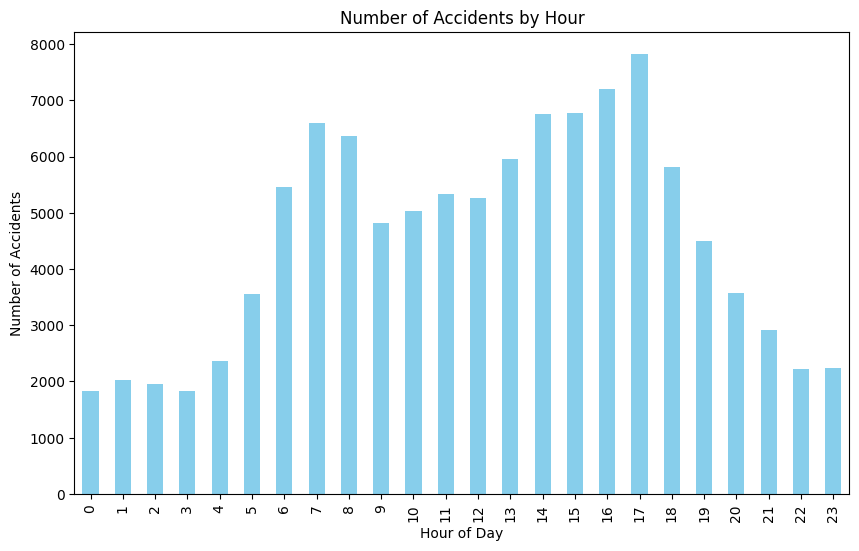

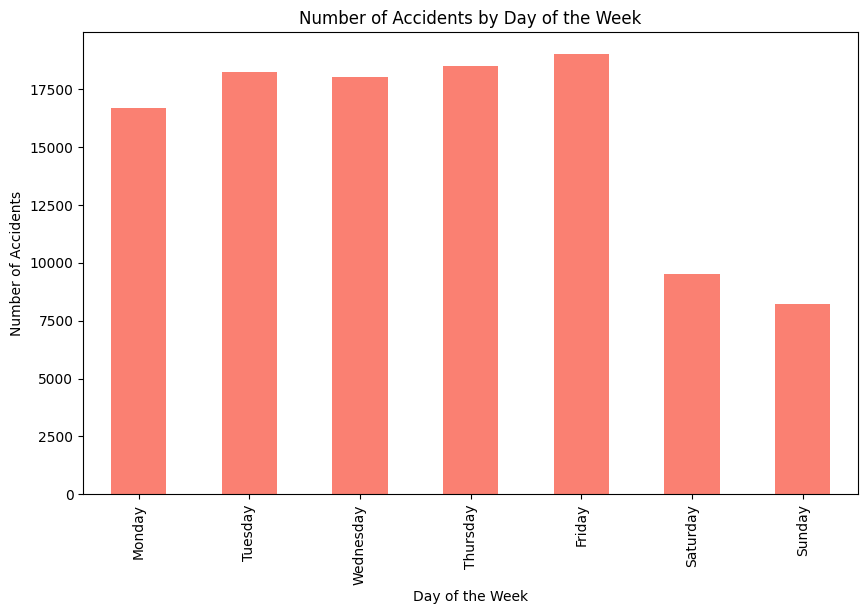

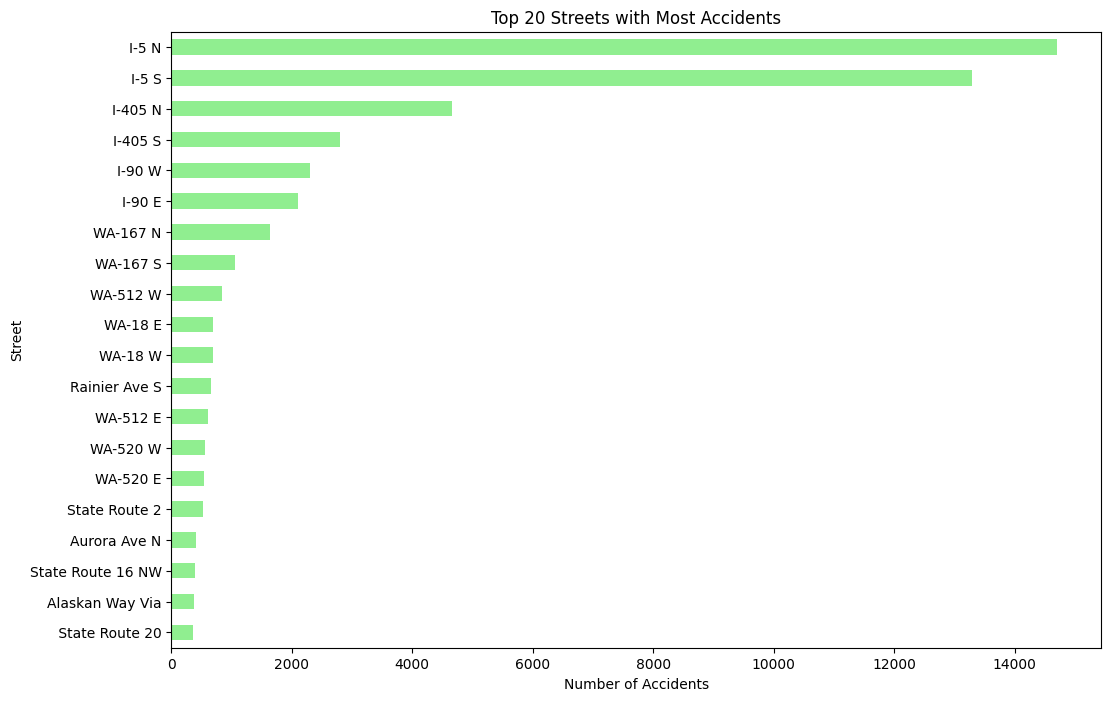

In [74]:
# Plot hourly accident distribution
plt.figure(figsize=(10, 6))
hourly_accidents.plot(kind='bar', color='skyblue')
plt.title("Number of Accidents by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Accidents")
plt.show()

# Plot daily accident distribution
plt.figure(figsize=(10, 6))
daily_accidents.plot(kind='bar', color='salmon')
plt.title("Number of Accidents by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Accidents")
plt.show()

# Plot top 20 streets with most accidents
plt.figure(figsize=(12, 8))
top_streets.plot(kind='barh', color='lightgreen')
plt.title("Top 20 Streets with Most Accidents")
plt.xlabel("Number of Accidents")
plt.ylabel("Street")
plt.gca().invert_yaxis()
plt.show()

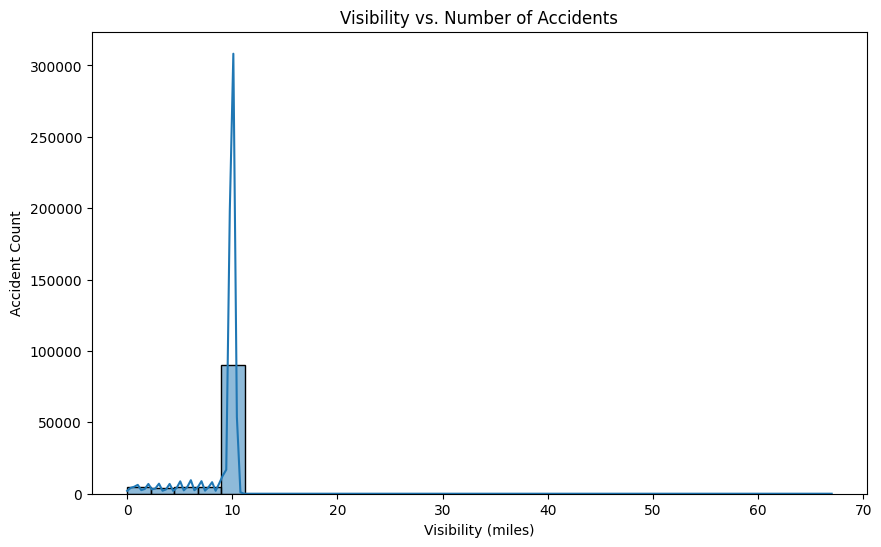

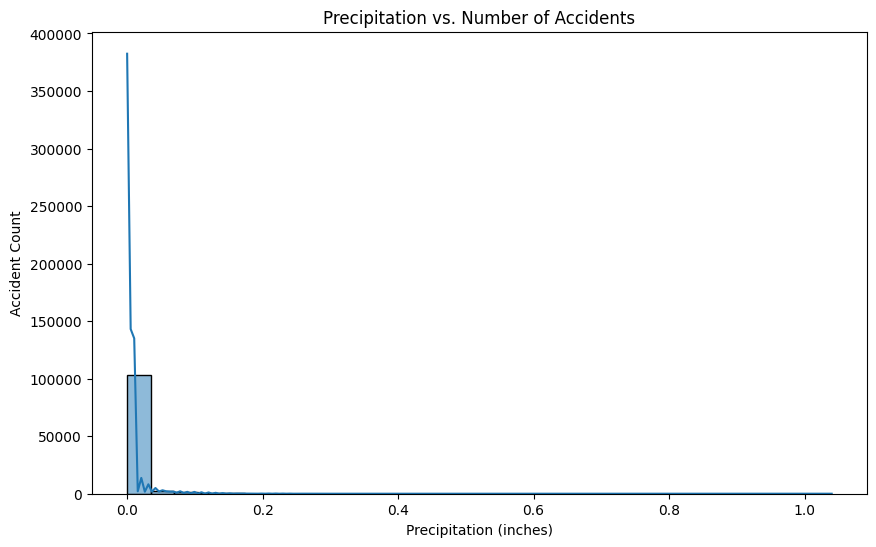

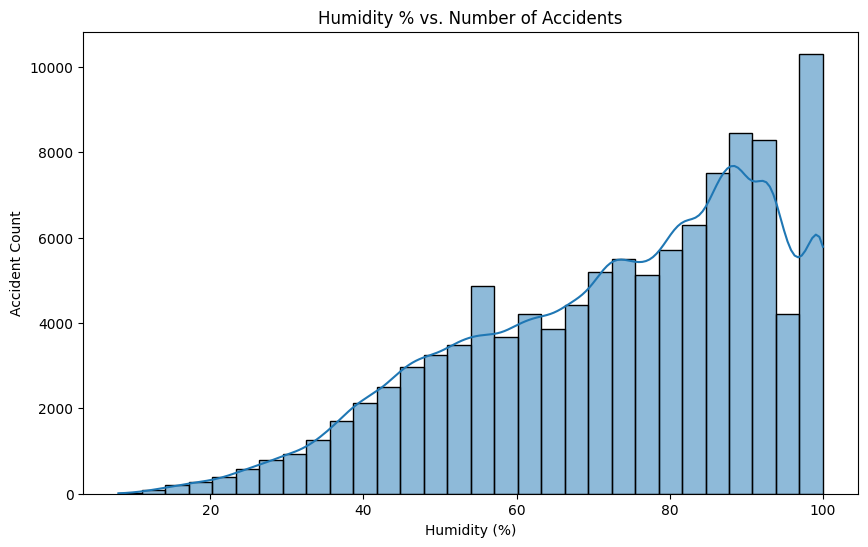

In [85]:

# Visibility vs. Accident Count
plt.figure(figsize=(10, 6))
sns.histplot(wa_data['Visibility(mi)'], bins=30, kde=True)
plt.title("Visibility vs. Number of Accidents")
plt.xlabel("Visibility (miles)")
plt.ylabel("Accident Count")
plt.show()

# Precipitation vs. Accident Count
plt.figure(figsize=(10, 6))
sns.histplot(wa_data['Precipitation(in)'], bins=30, kde=True)
plt.title("Precipitation vs. Number of Accidents")
plt.xlabel("Precipitation (inches)")
plt.ylabel("Accident Count")
plt.show()

# Visibility vs. Accident Count
plt.figure(figsize=(10, 6))
sns.histplot(wa_data['Humidity(%)'], bins=30, kde=True)
plt.title("Humidity % vs. Number of Accidents")
plt.xlabel("Humidity (%)")
plt.ylabel("Accident Count")
plt.show()




<Axes: title={'center': 'Number of Accidents by Weather Condition'}, xlabel='Weather_Condition'>

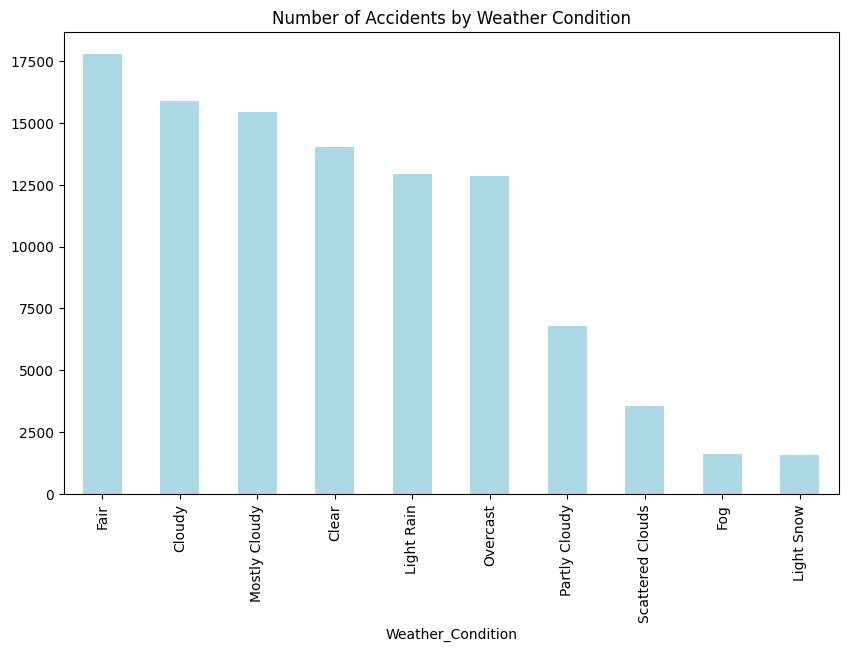

In [77]:
weather_accidents = wa_data['Weather_Condition'].value_counts().head(10)
weather_accidents.plot(kind='bar', figsize=(10, 6), color='lightblue', title="Number of Accidents by Weather Condition")


<Axes: title={'center': 'Accident Frequency by Temperature'}, ylabel='Frequency'>

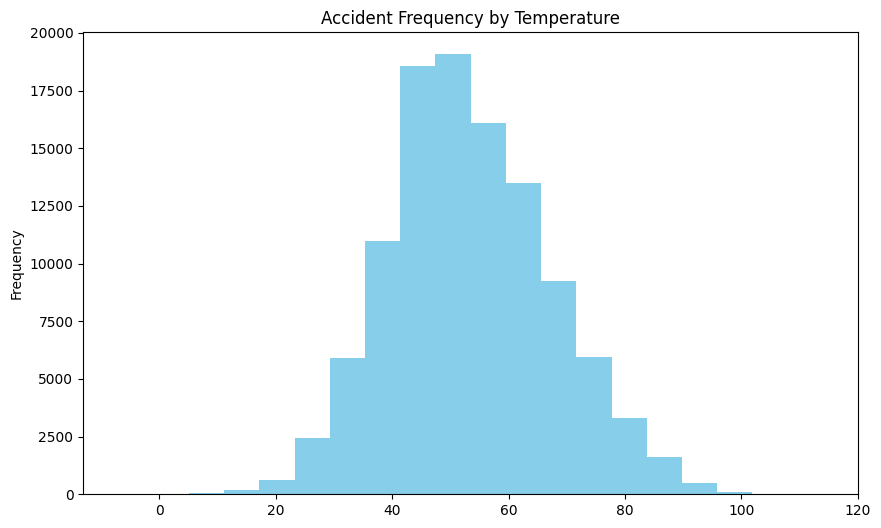

In [78]:
plt.figure(figsize=(10, 6))
wa_data['Temperature(F)'].dropna().plot(kind='hist', bins=20, color='skyblue', title="Accident Frequency by Temperature")


<Axes: title={'center': 'Number of Accidents by Month'}, xlabel='Month'>

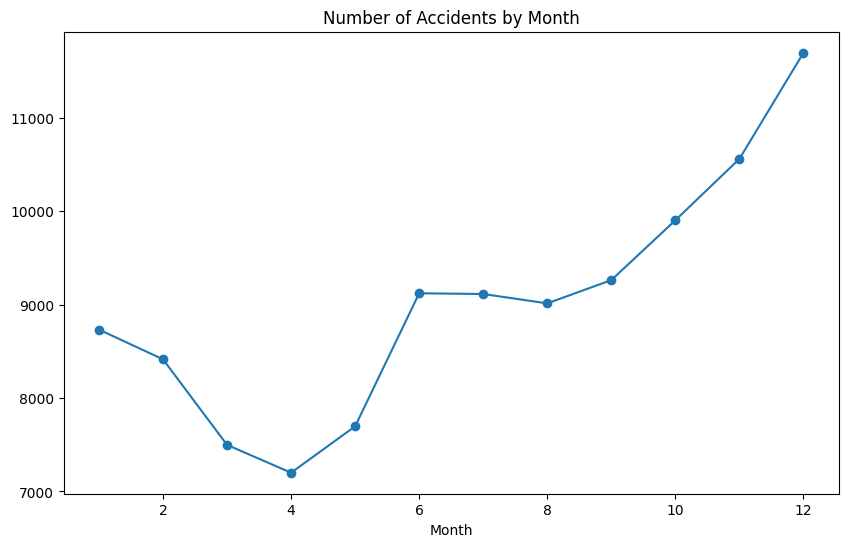

In [79]:
monthly_accidents = wa_data.groupby('Month').size()
monthly_accidents.plot(kind='line', figsize=(10, 6), marker='o', title="Number of Accidents by Month")


Text(0.5, 1.0, 'Accidents by Hour and Day of the Week')

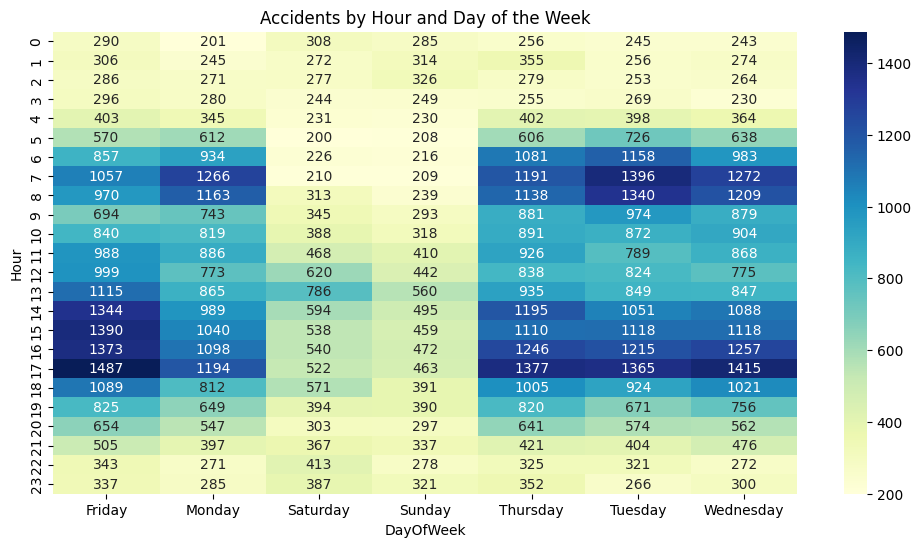

In [80]:
hour_day_accidents = wa_data.groupby(['Hour', 'DayOfWeek']).size().unstack()
plt.figure(figsize=(12, 6))
sns.heatmap(hour_day_accidents, cmap="YlGnBu", annot=True, fmt="d")
plt.title("Accidents by Hour and Day of the Week")


In [81]:
# Group by Street to get accident counts per street
street_accidents = wa_data['Street'].value_counts().reset_index()
street_accidents.columns = ['Street', 'Accident_Count']

# Merge with the main data to get latitude and longitude for each street
street_data = wa_data[['Street', 'Start_Lat', 'Start_Lng']].drop_duplicates(subset=['Street'])
street_accidents = street_accidents.merge(street_data, on='Street', how='left')

# Normalize accident counts for color mapping
min_count, max_count = street_accidents['Accident_Count'].min(), street_accidents['Accident_Count'].max()
norm = colors.Normalize(vmin=min_count, vmax=max_count)
colormap = cm.get_cmap('YlOrRd')

# Initialize Folium map centered around Washington
wa_map = folium.Map(location=[47.5, -120.5], zoom_start=7)

# Plot each street on the map with a color based on accident count
for _, row in street_accidents.iterrows():
    accident_count = row['Accident_Count']
    # Calculate color for the marker based on normalized accident count
    color = colors.to_hex(colormap(norm(accident_count)))
    
    folium.CircleMarker(
        location=(row['Start_Lat'], row['Start_Lng']),
        radius=5,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.9,
        popup=f"Street: {row['Street']}<br>Accidents: {accident_count}"
    ).add_to(wa_map)


# Save the map as an HTML file
wa_map.save("washington_accidents_map.html")


In [82]:
wa_data.dtypes

Severity                      int64
Start_Time           datetime64[ns]
End_Time                     object
Start_Lat                   float64
Start_Lng                   float64
End_Lat                     float64
End_Lng                     float64
Distance(mi)                float64
Description                  object
Street                       object
City                         object
County                       object
State                        object
Zipcode                      object
Country                      object
Temperature(F)              float64
Humidity(%)                 float64
Pressure(in)                float64
Visibility(mi)              float64
Wind_Speed(mph)             float64
Precipitation(in)           float64
Weather_Condition            object
Hour                          int32
DayOfWeek                    object
DayNumberOfWeek               int32
Month                         int32
High_Risk                     int64
dtype: object

In [87]:
# Select relevant features
features = ['Street', 'DayOfWeek','City', 'Hour', 'DayNumberOfWeek', 'Month', 'Temperature(F)', 'Weather_Condition', 'Humidity(%)', 'Visibility(mi)', 'Precipitation(in)']
X = wa_data[features]
y = wa_data['High_Risk']

In [88]:
X

,Street,DayOfWeek,City,Hour,DayNumberOfWeek,Month,Temperature(F),Weather_Condition,Humidity(%),Visibility(mi),Precipitation(in)
307061,I-5 N,Wednesday,Olympia,16,2,11,48.0,Scattered Clouds,77.0,10.0,0.007712
307062,I-5 N,Wednesday,Olympia,16,2,11,45.0,Scattered Clouds,82.0,10.0,0.007712
307063,Montlake Blvd NE,Wednesday,Seattle,16,2,11,48.9,Light Rain,77.0,10.0,0.030000
307064,State Route 12,Wednesday,Oakville,17,2,11,46.4,Partly Cloudy,87.0,9.0,0.007712
307065,Minor Ave,Wednesday,Seattle,17,2,11,48.9,Light Rain,77.0,10.0,0.030000
...,...,...,...,...,...,...,...,...,...,...,...
7728242,I-5 S,Friday,Seattle,11,4,8,65.0,Cloudy,65.0,10.0,0.000000
7728260,I-5 S,Friday,Seattle,12,4,8,69.0,Cloudy,54.0,10.0,0.000000
7728271,Rainier Ave S,Friday,Seattle,13,4,8,70.0,Cloudy,51.0,10.0,0.000000
7728316,Astoria-Megler Brg,Friday,Naselle,17,4,8,65.0,Mostly Cloudy,61.0,10.0,0.000000


In [89]:
# One-Hot Encode categorical columns
X = pd.get_dummies(X, columns=['Street', 'Weather_Condition', 'City', 'DayOfWeek'], drop_first=True)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize XGBoost with parameters for imbalanced data
xgb_model = XGBClassifier(scale_pos_weight=len(y) / sum(y), random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

# Evaluate the model
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))


              precision    recall  f1-score   support

           0       0.89      0.63      0.74     22215
           1       0.51      0.83      0.63     10252

    accuracy                           0.69     32467
   macro avg       0.70      0.73      0.68     32467
weighted avg       0.77      0.69      0.70     32467

ROC-AUC Score: 0.8070444382914497


In [90]:
# Initialize LightGBM with parameters for imbalanced data
lgb_model = lgb.LGBMClassifier(scale_pos_weight=len(y) / sum(y), random_state=42)

# Train the model
lgb_model.fit(X_train, y_train)

# Make predictions
y_pred = lgb_model.predict(X_test)
y_pred_proba = lgb_model.predict_proba(X_test)[:, 1]

# Evaluate the model
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 23765, number of negative: 51989
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000529 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1778
[LightGBM] [Info] Number of data points in the train set: 75754, number of used features: 695
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.313713 -> initscore=-0.782818
[LightGBM] [Info] Start training from score -0.782818
              precision    recall  f1-score   support

           0       0.89      0.62      0.73     22215
           1       0.50      0.84      0.63     10252

    accuracy                           0.69     32467
   macro avg       0.70      0.73      0.68     32467
weighted avg       0.77      0.69      0.70     32467

ROC-AUC Score: 0.8081673693287033


In [91]:
# Select relevant features
#features = ['Street', 'City', 'Hour', 'DayNumberOfWeek', 'Month', 'Temperature(F)', 'Weather_Condition', 'Humidity(%)', 'Visibility(mi)', 'Precipitation(in)']
#features = ['City','Street','Hour', 'Weather_Condition', 'Visibility(mi)', 'Precipitation(in)']
features = ['Street', 'DayOfWeek','City', 'Hour', 'Month', 'Temperature(F)', 'Weather_Condition', 'Humidity(%)', 'Visibility(mi)', 'Precipitation(in)']
X = wa_data[features]
y = wa_data['High_Risk']


In [92]:
# Preprocess categorical and numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['City', 'Street', 'Weather_Condition', 'DayOfWeek'])
    ],
    remainder='passthrough'
)

# Define and train the model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))

# Save the trained model
joblib.dump(model, 'high_risk_street_model_with_city.joblib')

              precision    recall  f1-score   support

           0       0.81      0.89      0.85     22215
           1       0.69      0.53      0.60     10252

    accuracy                           0.78     32467
   macro avg       0.75      0.71      0.72     32467
weighted avg       0.77      0.78      0.77     32467

ROC-AUC Score: 0.8318442808192804


['high_risk_street_model_with_city.joblib']

In [95]:
# Select relevant features
#features = ['City', 'Street', 'Hour', 'Weather_Condition', 'Visibility(mi)', 'Precipitation(in)']
features = ['Street', 'DayOfWeek','City', 'Hour', 'Month', 'Temperature(F)', 'Weather_Condition', 'Humidity(%)', 'Visibility(mi)', 'Precipitation(in)']
X = wa_data[features]
y = wa_data['High_Risk']

# Preprocess categorical and numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['City', 'Street', 'Weather_Condition','DayOfWeek'])
    ],
    remainder='passthrough'
)

# Define and train the Balanced Random Forest model pipeline
brf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', BalancedRandomForestClassifier(random_state=42))
])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
brf_model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = brf_model.predict(X_test)
y_pred_proba = brf_model.predict_proba(X_test)[:, 1]
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))

# Save the trained model
joblib.dump(brf_model, 'high_risk_street_brf_model_with_city.joblib')


              precision    recall  f1-score   support

           0       0.88      0.76      0.82     22215
           1       0.60      0.77      0.67     10252

    accuracy                           0.76     32467
   macro avg       0.74      0.77      0.75     32467
weighted avg       0.79      0.76      0.77     32467

ROC-AUC Score: 0.8310295871519149


['high_risk_street_brf_model_with_city.joblib']

In [36]:
# with open('road_risk_model.pkl', 'wb') as f:
#     pickle.dump(model, f)


In [96]:
# Add predictions and probabilities to the test set for analysis
X_test['High_Risk_Prediction'] = y_pred
X_test['High_Risk_Probability'] = y_pred_proba


In [97]:
# Filter the test data to get only high-risk predictions
high_risk_data = X_test[X_test['High_Risk_Prediction'] == 1]
high_risk_data

,Street,DayOfWeek,City,Hour,Month,Temperature(F),Weather_Condition,Humidity(%),Visibility(mi),Precipitation(in),High_Risk_Prediction,High_Risk_Probability
7346817,I-5 S,Tuesday,Mountlake Terrace,10,9,59.0,Cloudy,83.0,10.0,0.000000,1,0.760000
491184,WA-18 E,Wednesday,Federal Way,14,7,79.0,Partly Cloudy,38.0,10.0,0.007712,1,0.820000
3524340,Alaskan Way Via,Tuesday,Seattle,12,11,57.0,Mostly Cloudy,89.0,10.0,0.000000,1,0.760000
752869,I-405 S,Tuesday,Bellevue,6,12,27.0,Cloudy,85.0,5.0,0.000000,1,0.590000
3214654,NE Points Dr,Wednesday,Kirkland,7,10,44.1,Clear,89.0,10.0,0.007712,1,0.510000
...,...,...,...,...,...,...,...,...,...,...,...,...
1861404,I-405 N,Friday,Renton,12,9,64.0,Cloudy,70.0,10.0,0.000000,1,0.798333
1943567,WA-512 W,Friday,Lakewood,14,7,68.0,Cloudy,70.0,10.0,0.000000,1,0.830000
2633840,I-5 S,Monday,Mount Vernon,14,8,73.9,Clear,62.0,7.0,0.007712,1,0.870000
2294219,I-90 W,Saturday,Bellevue,22,2,39.0,Overcast,93.0,10.0,0.000000,1,0.632500


In [98]:
# Group by Street and Hour to get the list of high-risk areas by time
high_risk_by_hour = high_risk_data.groupby(['Street', 'Hour']).size().reset_index(name='High_Risk_Count')

# Sort by high-risk count and hour for better readability
high_risk_by_hour = high_risk_by_hour.sort_values(by=['High_Risk_Count', 'Hour'], ascending=[False, True])

# Display the top high-risk areas by time of day
print("Top high-risk areas by time of day:")
print(high_risk_by_hour.head(10))

# Generate a list of recommendations in the desired format
high_risk_recommendations = []
for _, row in high_risk_by_hour.iterrows():
    recommendation = f"Avoid {row['Street']} during {row['Hour']}:00 - it has a high risk of accidents."
    high_risk_recommendations.append(recommendation)

# Print the recommendations
for recommendation in high_risk_recommendations:
    print(recommendation)


Top high-risk areas by time of day:
     Street  Hour  High_Risk_Count
1545  I-5 S    17              232
1542  I-5 S    14              215
1543  I-5 S    15              205
1544  I-5 S    16              202
1510  I-5 N     6              201
1521  I-5 N    17              201
1519  I-5 N    15              198
1518  I-5 N    14              192
1511  I-5 N     7              184
1512  I-5 N     8              183
Avoid I-5 S during 17:00 - it has a high risk of accidents.
Avoid I-5 S during 14:00 - it has a high risk of accidents.
Avoid I-5 S during 15:00 - it has a high risk of accidents.
Avoid I-5 S during 16:00 - it has a high risk of accidents.
Avoid I-5 N during 6:00 - it has a high risk of accidents.
Avoid I-5 N during 17:00 - it has a high risk of accidents.
Avoid I-5 N during 15:00 - it has a high risk of accidents.
Avoid I-5 N during 14:00 - it has a high risk of accidents.
Avoid I-5 N during 7:00 - it has a high risk of accidents.
Avoid I-5 N during 8:00 - it has a high r

In [99]:
high_risk_data

,Street,DayOfWeek,City,Hour,Month,Temperature(F),Weather_Condition,Humidity(%),Visibility(mi),Precipitation(in),High_Risk_Prediction,High_Risk_Probability
7346817,I-5 S,Tuesday,Mountlake Terrace,10,9,59.0,Cloudy,83.0,10.0,0.000000,1,0.760000
491184,WA-18 E,Wednesday,Federal Way,14,7,79.0,Partly Cloudy,38.0,10.0,0.007712,1,0.820000
3524340,Alaskan Way Via,Tuesday,Seattle,12,11,57.0,Mostly Cloudy,89.0,10.0,0.000000,1,0.760000
752869,I-405 S,Tuesday,Bellevue,6,12,27.0,Cloudy,85.0,5.0,0.000000,1,0.590000
3214654,NE Points Dr,Wednesday,Kirkland,7,10,44.1,Clear,89.0,10.0,0.007712,1,0.510000
...,...,...,...,...,...,...,...,...,...,...,...,...
1861404,I-405 N,Friday,Renton,12,9,64.0,Cloudy,70.0,10.0,0.000000,1,0.798333
1943567,WA-512 W,Friday,Lakewood,14,7,68.0,Cloudy,70.0,10.0,0.000000,1,0.830000
2633840,I-5 S,Monday,Mount Vernon,14,8,73.9,Clear,62.0,7.0,0.007712,1,0.870000
2294219,I-90 W,Saturday,Bellevue,22,2,39.0,Overcast,93.0,10.0,0.000000,1,0.632500


In [105]:
high_risk_data['Visibility(mi)'].mean()


np.float64(8.952386530472396)

In [106]:
wa_data['Precipitation(in)'].mean()

np.float64(0.007711515863689777)

In [107]:
wa_data['Humidity(%)'].mean()

np.float64(73.0435668434273)

In [109]:
wa_data['Temperature(F)'].mean()

np.float64(53.424610927459796)

In [110]:
high_risk_data.to_csv('high_risk_data.csv')

In [111]:

# Aggregate high-risk counts by Street, Hour, and Month
high_risk_by_time = high_risk_data.groupby(['Street', 'Hour']).size().reset_index(name='High_Risk_Count')
high_risk_by_time.sort_values('High_Risk_Count', ascending=False)

,Street,Hour,High_Risk_Count
1545,I-5 S,17,232
1542,I-5 S,14,215
1543,I-5 S,15,205
1544,I-5 S,16,202
1521,I-5 N,17,201
...,...,...,...
1093,Berkeley St SW,18,1
1094,Berkely St SW,1,1
1095,Berthusen Rd,14,1
1096,Beverly Blvd,10,1


In [112]:
from sklearn.model_selection import RandomizedSearchCV

# Define the feature columns and target variable
#features = ['City', 'Street', 'Hour', 'Weather_Condition', 'Visibility(mi)', 'Precipitation(in)']
features = ['Street', 'DayOfWeek','City', 'Hour', 'Month', 'Temperature(F)', 'Weather_Condition', 'Humidity(%)', 'Visibility(mi)', 'Precipitation(in)']
X = wa_data[features]
y = wa_data['High_Risk']

# Preprocess categorical and numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['City', 'Street', 'Weather_Condition', 'DayOfWeek'])
    ],
    remainder='passthrough'
)

# Define the model pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', BalancedRandomForestClassifier(random_state=42))
])

# Define the hyperparameters and their respective ranges
param_dist = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__max_features': ['sqrt', 'log2', None]
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_dist,
    n_iter=20,  # Number of parameter settings sampled
    scoring='roc_auc',  # Use 'roc_auc' to focus on AUC score
    cv=5,  # 5-fold cross-validation
    random_state=42,
    n_jobs=-1  # Use all available cores
)

# Perform hyperparameter tuning
random_search.fit(X, y)

# Best model and parameters
best_model = random_search.best_estimator_
print("Best parameters found: ", random_search.best_params_)

# Make predictions on test data if there is a separate test set
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))

# Save the tuned model
joblib.dump(best_model, 'high_risk_street_model_tuned.joblib')


/opt/anaconda3/envs/newenv/lib/python3.11/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/opt/anaconda3/envs/newenv/lib/python3.11/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
/opt/anaconda3/envs/newenv/lib/python3.11/site-packages/imblearn/ensemble/_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the f

Best parameters found:  {'classifier__n_estimators': 300, 'classifier__min_samples_split': 5, 'classifier__min_samples_leaf': 1, 'classifier__max_features': 'sqrt', 'classifier__max_depth': None}
              precision    recall  f1-score   support

           0       0.99      0.85      0.91     22215
           1       0.75      0.98      0.85     10252

    accuracy                           0.89     32467
   macro avg       0.87      0.92      0.88     32467
weighted avg       0.91      0.89      0.89     32467

ROC-AUC Score: 0.9840383949500716


['high_risk_street_model_tuned.joblib']

### Check if the model is overfitting

#### 1. Train and Validation/Test Accuracy or Error Comparison

**High Training Score, Low Test Score:** A large gap between the training and test accuracy suggests that the model is fitting the training data too well and failing to generalize.

**Similar Training and Test Score:** If both scores are similarly high, this indicates good generalization (no overfitting).

**Both Low Scores:** If both scores are low, the model may be underfitting.


In [113]:
train_score = best_model.score(X_train, y_train)
test_score = best_model.score(X_test, y_test)

print(f"Training Accuracy: {train_score}")
print(f"Validation/Test Accuracy: {test_score}")


Training Accuracy: 0.8908968503313356
Validation/Test Accuracy: 0.8910278128561309


The similarity between the training accuracy and the validation/test accuracy suggests that:

**Good Generalization:** The model is likely generalizing well to new data. Since the training and validation scores are very close, the model is not overfitting (where training accuracy is high but validation accuracy is much lower) nor underfitting (where both scores would be low).

**Balanced Performance:** With both training and validation accuracies in the mid-80% range, the model is performing consistently across different datasets and hasn’t memorized or under-learned the training data patterns.